<a href="https://colab.research.google.com/github/PranavHariharan19/CancerNet/blob/main/BreastCancerDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import os, shutil
from sklearn.model_selection import train_test_split

base_dir = "My Drive/IDC dataset/organised"
output_dir = "My Drive/IDC dataset/datasets/idc"

# make output dirs
for split in ["train", "val", "test"]:
    for cls in ["0", "1"]:
        os.makedirs(os.path.join(output_dir, split, cls), exist_ok=True)

# list all patient folders
patients = os.listdir(base_dir)

# train/val/test split by patient
train_patients, test_patients = train_test_split(patients, test_size=0.2, random_state=42)
train_patients, val_patients  = train_test_split(train_patients, test_size=0.2, random_state=42)

def copy_images(patients, split):
    for pid in patients:
        for cls in ["0", "1"]:
            class_dir = os.path.join(base_dir, pid, cls)
            if not os.path.exists(class_dir):
                continue
            for fname in os.listdir(class_dir):
                src = os.path.join(class_dir, fname)
                dst = os.path.join(output_dir, split, cls, f"{pid}_{fname}")
                shutil.copy(src, dst)

# copy to new folders
copy_images(train_patients, "train")
copy_images(val_patients, "val")
copy_images(test_patients, "test")

print("Dataset prepared at:", output_dir)

FileNotFoundError: [Errno 2] No such file or directory: 'My Drive/IDC dataset/organised'

In [3]:
#Loading the dataset
import os
from pathlib import Path
INPUT_DATASET="My Drive/IDC dataset/datasets/idc"
BASE_PATH="My Drive/IDC dataset/datasets/idc"
TRAIN_PATH=os.path.sep.join([BASE_PATH,"train"])
VAL_PATH=os.path.sep.join([BASE_PATH,"val"])
TEST_PATH=os.path.sep.join([BASE_PATH,"test"])
TRAIN_SPLIT=0.8
VAL_SPLIT=0.1

#Organising datasets
from imutils import paths
import random
import shutil
import os
originalPaths=list(paths.list_images(INPUT_DATASET))
random.seed(7)
random.shuffle(originalPaths)
index=int(len(originalPaths)*TRAIN_SPLIT)
trainPaths=originalPaths[:index]
testPaths=originalPaths[index:]
index=int(len(trainPaths)*VAL_SPLIT)
valPaths=trainPaths[:index]
trainPaths=trainPaths[index:]
datasets=[("train",trainPaths,TRAIN_PATH),("val",valPaths,VAL_PATH),("test",testPaths,TEST_PATH)]
for(setType,originalPaths,basepath) in datasets:
    if not os.path.exists(basepath):
        os.makedirs(basepath)
    for path in originalPaths:
        filename=path.split(os.path.sep)[-1]
        label=filename[-5:-4]
        labelPath=os.path.sep.join([basepath,label])
        if not os.path.exists(labelPath):
            os.makedirs(labelPath)
        newPath=os.path.sep.join([labelPath,filename])
        shutil.copy2(path,newPath)

# Building the model
import tensorflow as tf
from keras import backend as K


class CancerNet:
  @staticmethod
  def build(width, height, depth, classes):
    model = tf.keras.Sequential()
    shape = (height, width, depth)
    channelDim = -1
    if K.image_data_format() == "channels_first":
      shape = (depth, height, width)
      channelDim = 1

    # Layer1
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=shape))
    model.add(tf.keras.layers.BatchNormalization(axis=channelDim))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))
    model.add(tf.keras.layers.Dropout(0.25))
    # Layer2
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu"))
    model.add(tf.keras.layers.BatchNormalization(axis=channelDim))


    # Layer5
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu"))
    model.add(tf.keras.layers.BatchNormalization(axis=channelDim))

    # Layer6
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu"))
    model.add(tf.keras.layers.BatchNormalization(axis=channelDim))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))
    model.add(tf.keras.layers.Dropout(0.25))

    # Dense layers
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=256, activation="relu"))
    model.add(tf.keras.layers.BatchNormalization(axis=channelDim))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
    return model





Found 21518 files belonging to 2 classes.
Found 5847 files belonging to 2 classes.
Found 7343 files belonging to 2 classes.
Class Weights: {0: 0.6076471252682707, 1: 2.8224029380902413}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
673/673 ━━━━━━━━━━━━━━━━━━━━ 1327s 2s/step - accuracy: 0.7747 - auc: 0.7713 - loss: 0.0621 - precision: 0.4239 - recall: 0.5481 - val_accuracy: 0.7226 - val_auc: 0.8165 - val_loss: 0.0365 - val_precision: 0.3812 - val_recall: 0.7381
Epoch 2/30
673/673 ━━━━━━━━━━━━━━━━━━━━ 559s 830ms/step - accuracy: 0.8523 - auc: 0.8743 - loss: 0.0233 - precision: 0.5950 - recall: 0.5690 - val_accuracy: 0.7713 - val_auc: 0.7740 - val_loss: 0.0295 - val_precision: 0.4072 - val_recall: 0.4464
Epoch 3/30
673/673 ━━━━━━━━━━━━━━━━━━━━ 517s 764ms/step - accuracy: 0.8634 - auc: 0.8933 - loss: 0.0206 - precision: 0.6292 - recall: 0.5939 - val_accuracy: 0.7802 - val_auc: 0.8291 - val_loss: 0.0295 - val_precision: 0.4480 - val_recall: 0.6742
Epoch 4/30
673/673 ━━━━━━━━━━━━━━━━━━━━ 518s 770ms/step - accuracy: 0.8679 - auc: 0.8942 - loss: 0.0206 - precision: 0.6477 - recall: 0.5876 - val_accuracy: 0.4501 - val_auc: 0.8182 - val_loss: 0.0736 - val_precision: 0.2535 - val_recall: 0.9739
Epoch 5/30
673/673

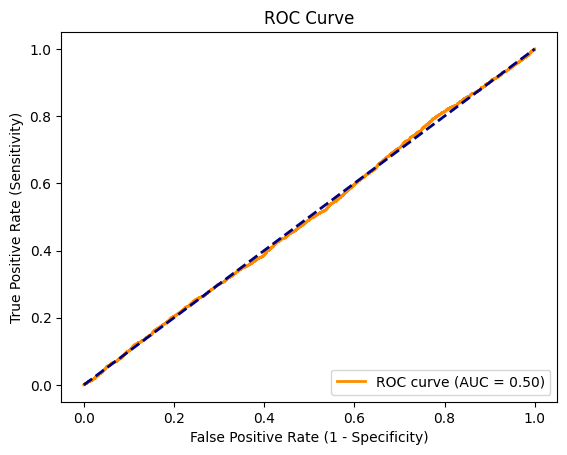


Classification Report:
              precision    recall  f1-score   support

         0.0       0.66      0.54      0.59      4853
         1.0       0.34      0.45      0.39      2490

    accuracy                           0.51      7343
   macro avg       0.50      0.50      0.49      7343
weighted avg       0.55      0.51      0.52      7343


Confusion Matrix:
[[2621 2232]
 [1363 1127]]

Accuracy: 0.5104
Specificity: 0.5401
Sensitivity: 0.4526


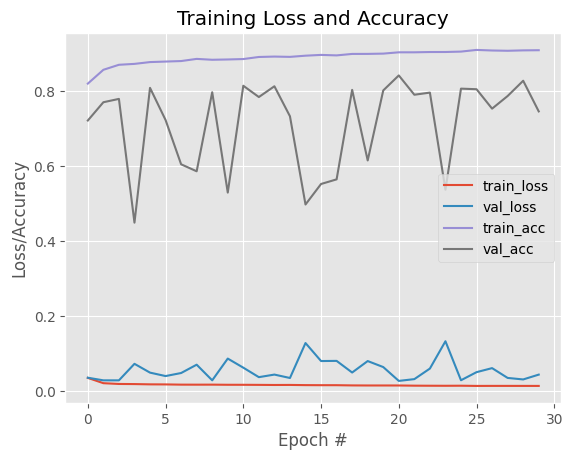

In [4]:
# Load dataset
img_size = (64, 64)
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/My Drive/IDC dataset/datasets/idc/train",
    image_size=img_size,
    batch_size=batch_size,
    label_mode="binary"
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/My Drive/IDC dataset/datasets/idc/val",
    image_size=img_size,
    batch_size=batch_size,
    label_mode="binary"
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/My Drive/IDC dataset/datasets/idc/test",
    image_size=img_size,
    batch_size=batch_size,
    label_mode="binary"
)
import tensorflow as tf

def focal_loss(gamma=2., alpha=.25):
    def loss(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, 1e-7, 1-1e-7)  # avoid log(0)
        pt = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
        return -tf.reduce_mean(alpha * tf.pow(1 - pt, gamma) * tf.math.log(pt))
    return loss

# Normalize (like rescale=1./255)
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

from collections import Counter
import numpy as np

# Extract all labels from train_ds
y_train_all = np.concatenate([y.numpy() for x, y in train_ds], axis=0)
y_train_all = y_train_all.ravel()
from collections import Counter
class_counts = Counter(y_train_all)
total = sum(class_counts.values())

# Compute class weights
class_weights = {int(cls): float(total/(len(class_counts)*count)) for cls, count in class_counts.items()}
print("Class Weights:", class_weights)

# Optional: data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))


# -----------------------------
# Build, compile, and train model
# -----------------------------
model = CancerNet.build(width=64, height=64, depth=3, classes=2)
model.compile(optimizer="adam", loss=focal_loss(), metrics=["accuracy",tf.keras.metrics.AUC(name="auc"),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall")])
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_auc', patience=5, restore_best_weights=True)
M = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    class_weight=class_weights
)


# Evaluate the model
loss, acc, auc,precision, recall = model.evaluate(test_ds)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {acc:.4f}")
print(f"Test AUC: {auc:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")

# Make predictions and calculate metrics
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get true labels from the test dataset
y_true = np.concatenate([y for x, y in test_ds], axis=0)

# Make predictions
y_pred_probs = model.predict(test_ds)
threshold = 0.3  # try 0.2~0.4 for minority class
y_pred = (y_pred_probs > threshold).astype(int)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

# Calculate and print Confusion Matrix and other metrics
cm = confusion_matrix(y_true, y_pred)
total = np.sum(cm)
accuracy = (cm[0, 0] + cm[1, 1]) / total
sensitivity= cm[1, 1] / (cm[1, 0] + cm[1, 1])
specificity= cm[0, 0] / (cm[0, 0] + cm[0, 1])
print("\nConfusion Matrix:")
print(cm)
print(f"\nAccuracy: {accuracy:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")

# Visualization of results
import matplotlib.pyplot as plt

N = 30  # Since epochs=30
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), M.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), M.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), M.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), M.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

#End of model